In [13]:
print("Loading Libraries...")
import os, sys
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scin
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn import neighbors, datasets
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [2]:
#Local
print("Loading directories..")
path_coords = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/coords'
path_rms = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/rms'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [3]:
os.chdir(path_coords)
coordlist = os.listdir(path_coords)
os.chdir(path_rms)
rmslist = os.listdir(path_rms)

In [4]:
coordlist

['int-01_coords.dat',
 'int-02_coords.dat',
 'int-03_coords.dat',
 'int-04_coords.dat',
 'int-05_coords.dat',
 'int-06_coords.dat',
 'int-07_coords.dat',
 'int-08_coords.dat',
 'int-09_coords.dat',
 'int-10_coords.dat',
 'int-11_coords.dat',
 'int-12_coords.dat',
 'int-tip_coords.dat',
 'lead_coords.dat',
 'pside__coords.dat',
 'sside__coords.dat',
 'tip_coords.dat',
 'trail_coords.dat']

In [5]:
rmslist

['int-01-rms.dat',
 'int-02-rms.dat',
 'int-03-rms.dat',
 'int-04-rms.dat',
 'int-05-rms.dat',
 'int-06-rms.dat',
 'int-07-rms.dat',
 'int-08-rms.dat',
 'int-09-rms.dat',
 'int-10-rms.dat',
 'int-11-rms.dat',
 'int-12-rms.dat',
 'int-tip-rms.dat',
 'lead-rms.dat',
 'pside-rms.dat',
 'sside-rms.dat',
 'tip-rms.dat',
 'trail-rms.dat']

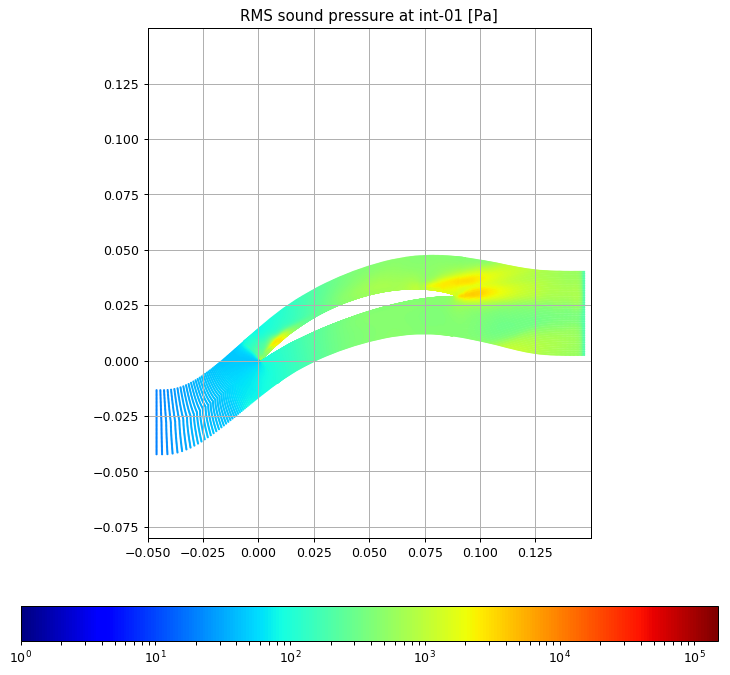

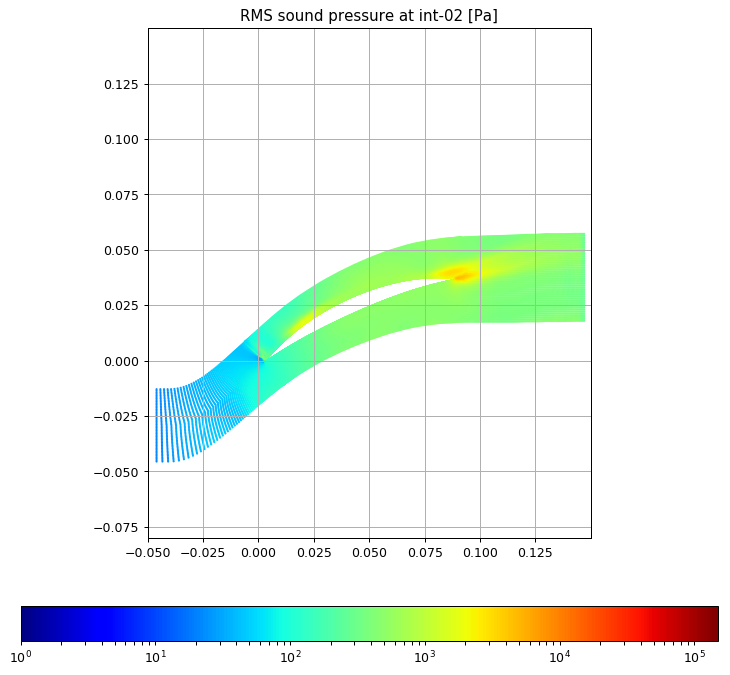

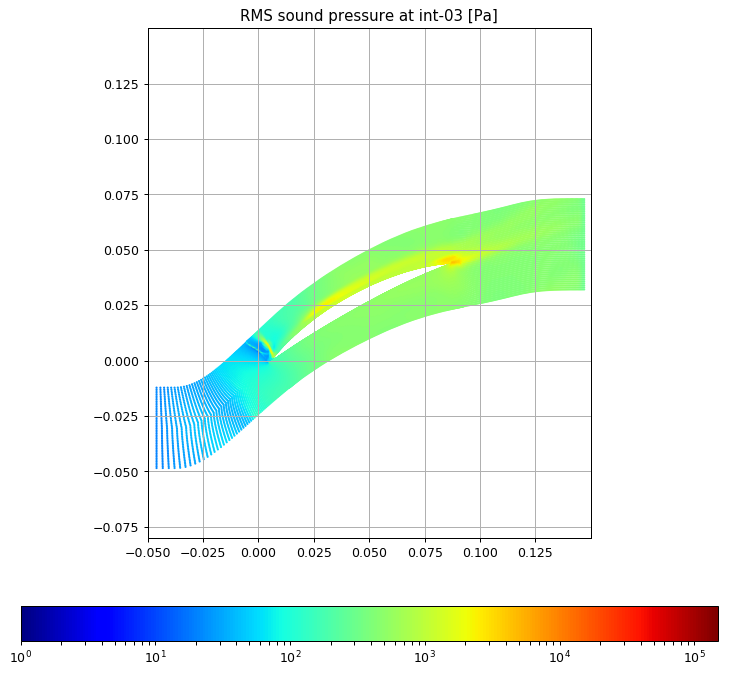

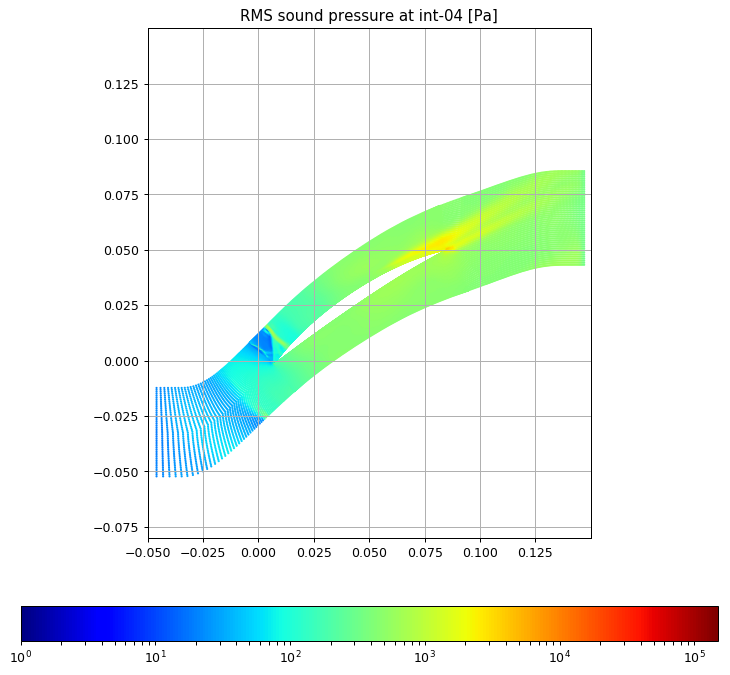

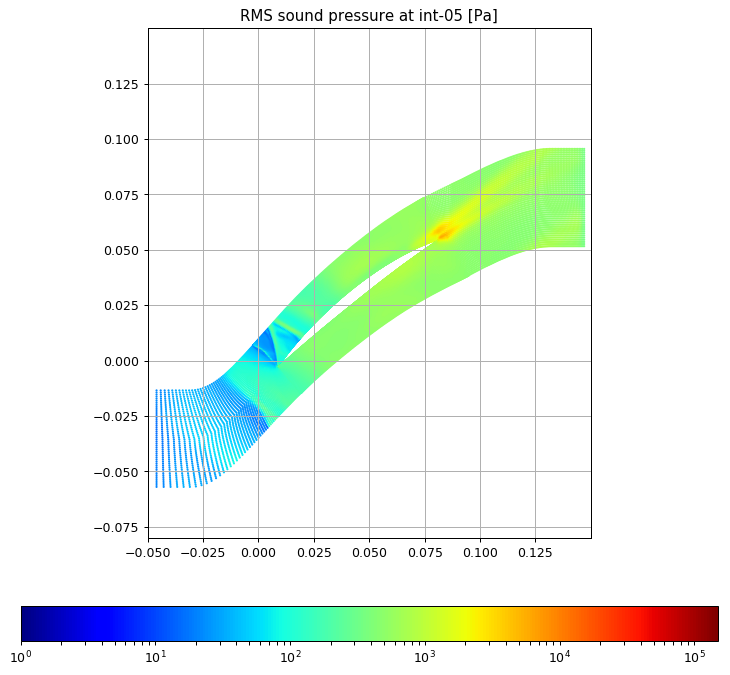

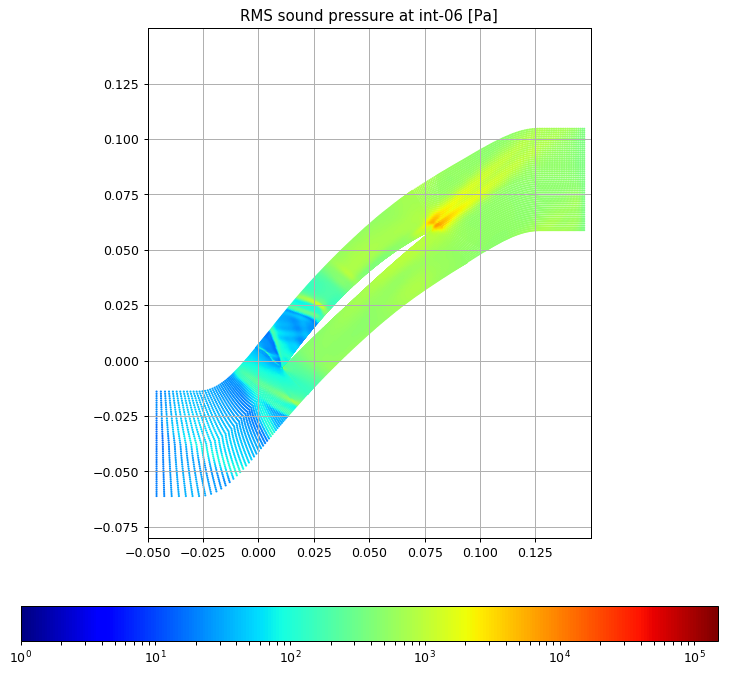

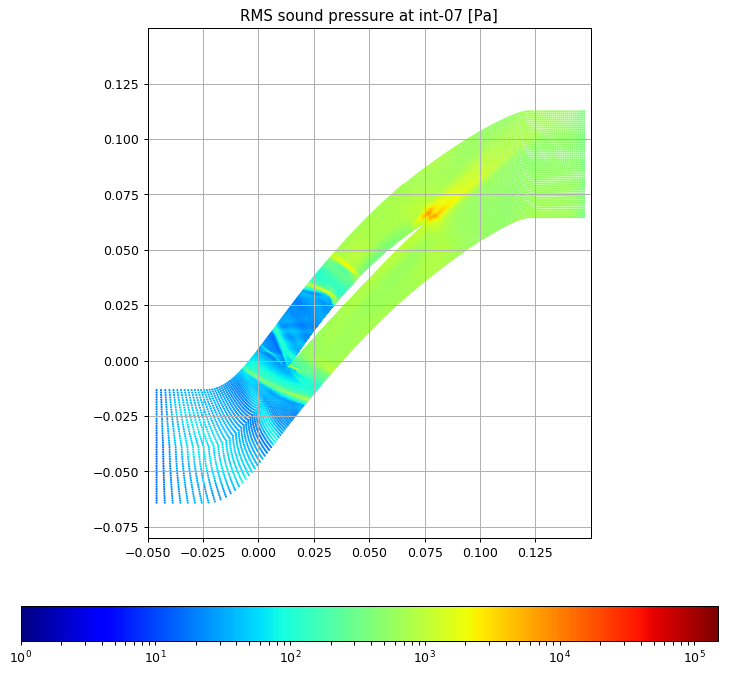

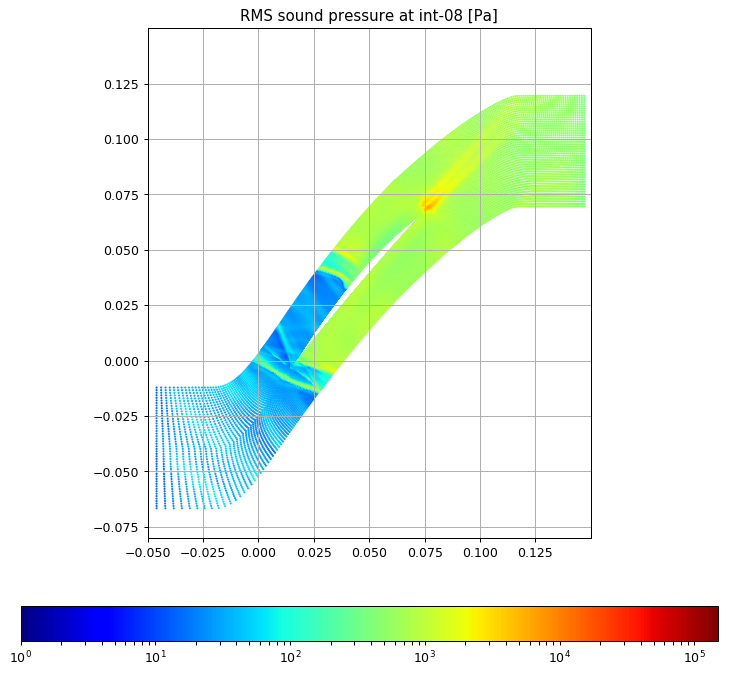

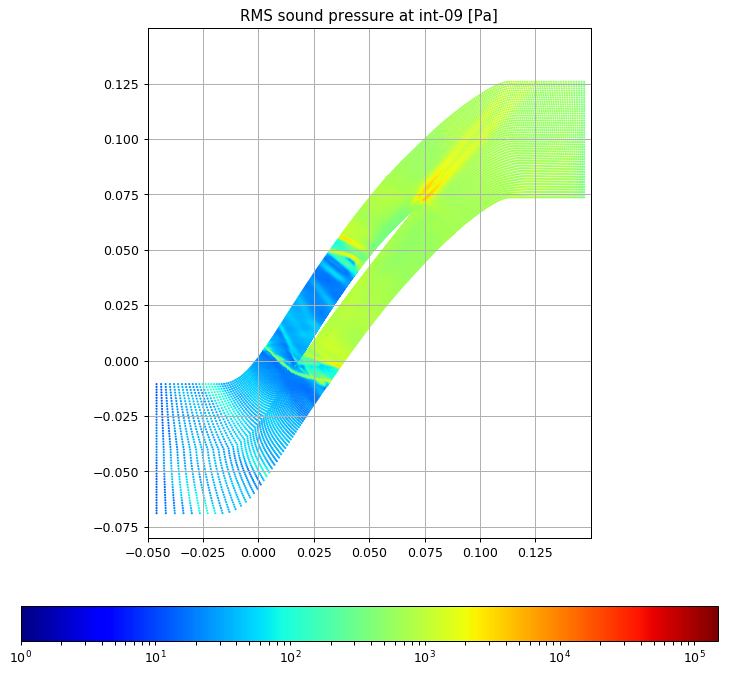

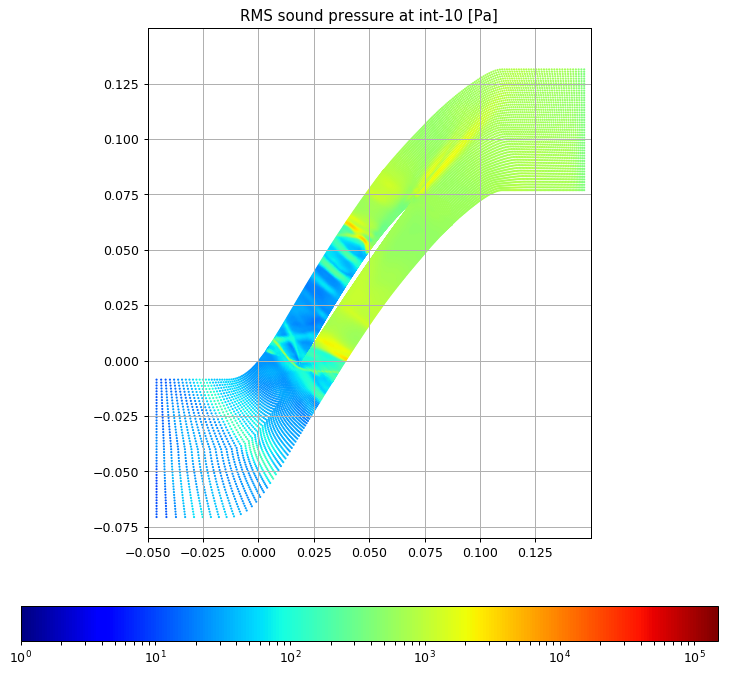

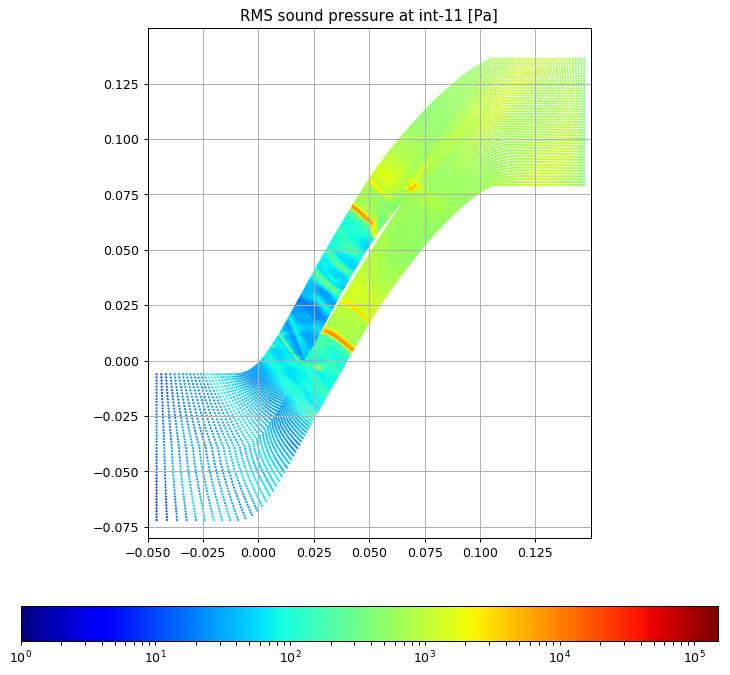

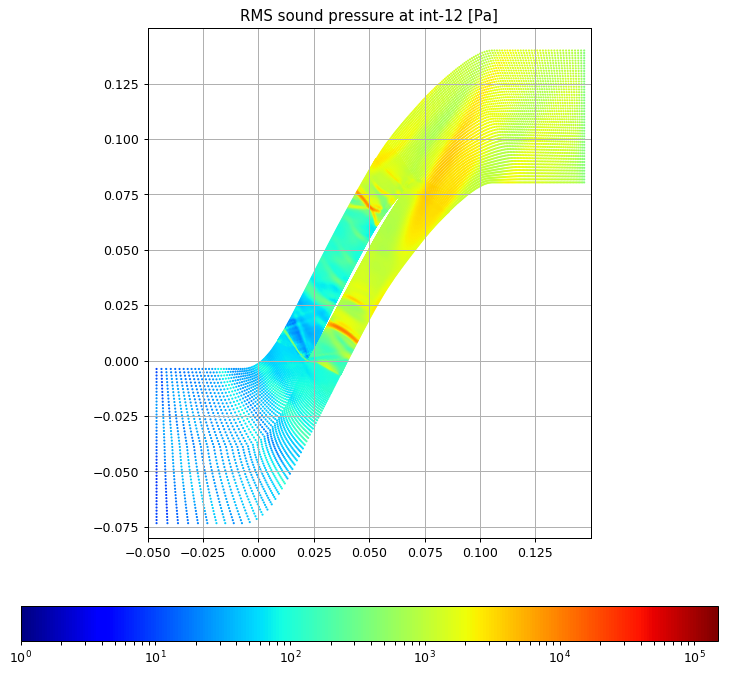

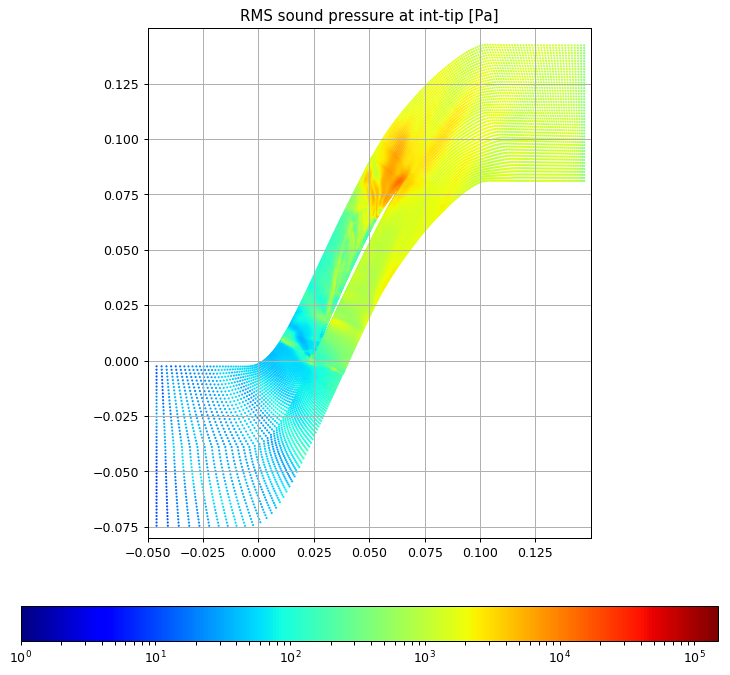

Exiting plotting loop...


In [25]:
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure']
    spl_db = data['rms_spldb']
    spl_min = spl.min()
    spl_max = spl.max()

    sound_pressure_plot = plt.figure(figsize=(10, 10), dpi=90)
    ax0 = sound_pressure_plot.gca()
    spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=1.5e05, clip=False))
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="horizontal", pad=0.1)
    ax0.set_title(str('RMS sound pressure at ' + str(location) + ' [Pa]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    plt.grid()
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    
    i = i+1
print("Exiting plotting loop...")

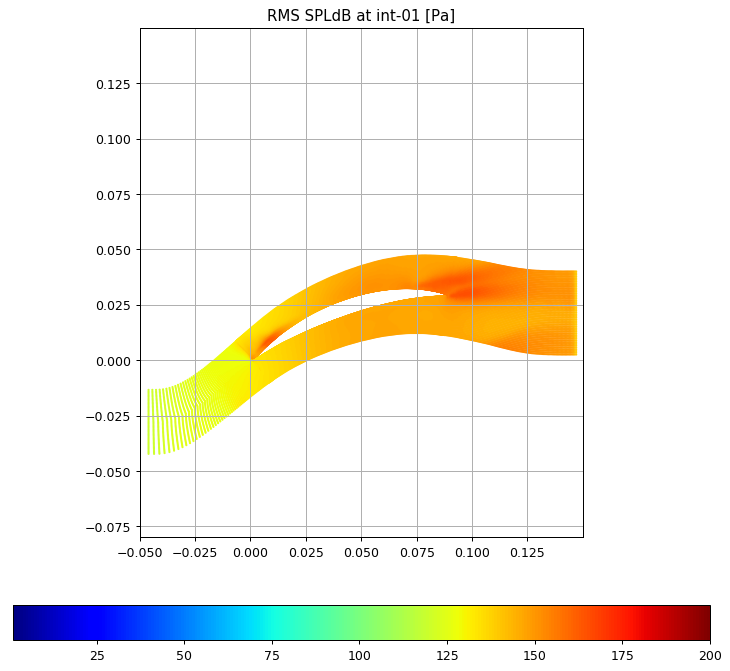

Exiting plotting loop...


In [18]:
i = 0
while i < 1:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure']
    spl_db = data['rms_spldb']
    spl_min = spl.min()
    spl_max = spl.max()

    sound_pressure_plot = plt.figure(figsize=(10, 10), dpi=90)
    ax0 = sound_pressure_plot.gca()
    spl_plot = ax0.scatter(z, x, c=spl_db, s=0.5, cmap=plt.cm.jet, vmin=1, vmax=200)
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="horizontal", pad=0.1)
    ax0.set_title(str('RMS SPLdB at ' + str(location) + ' [dB]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    plt.grid()
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    
    i = i+1
print("Exiting plotting loop...")

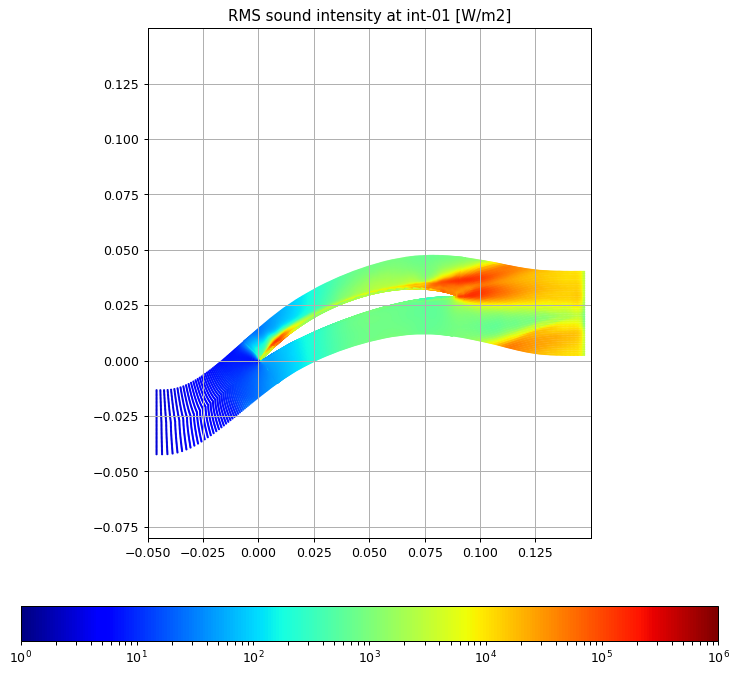

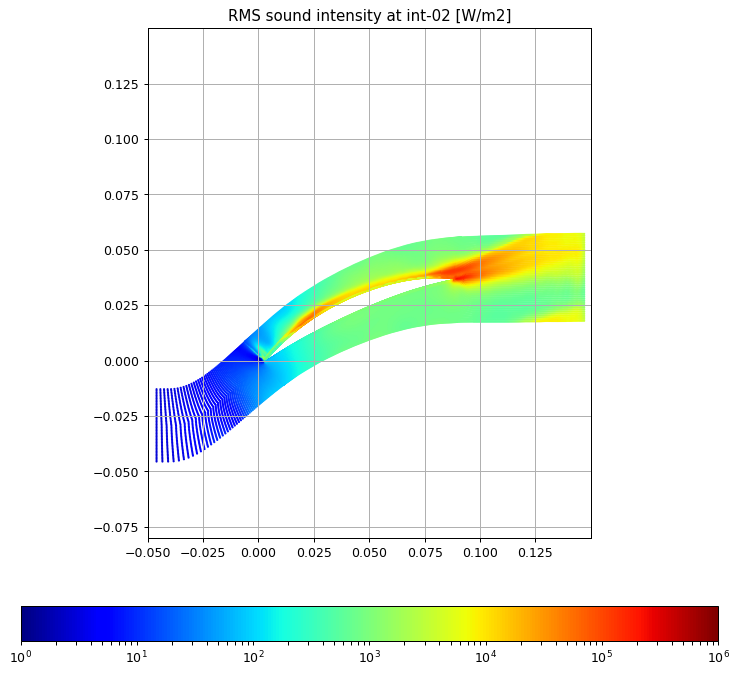

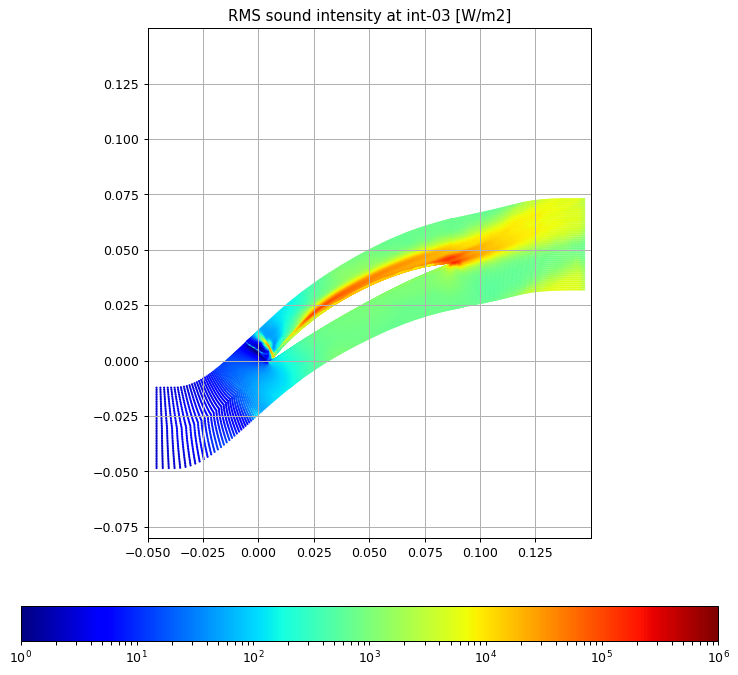

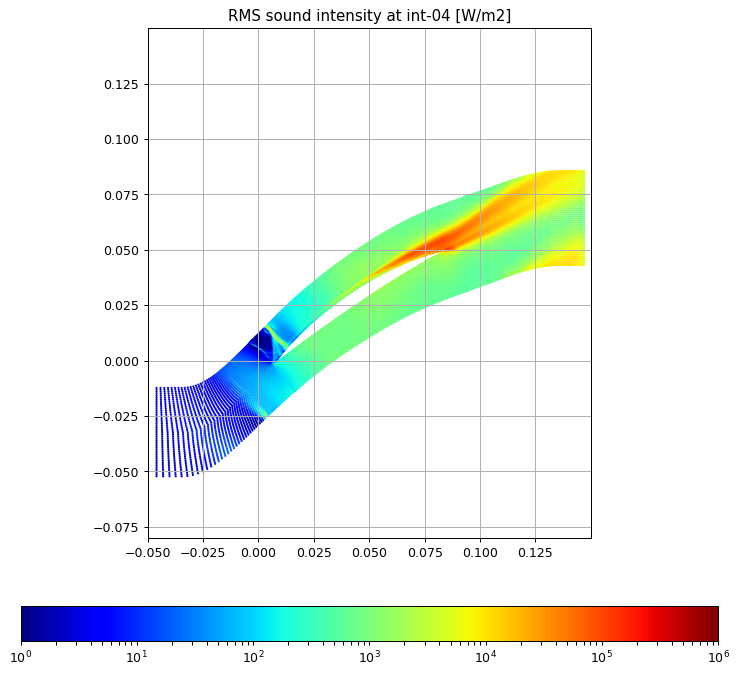

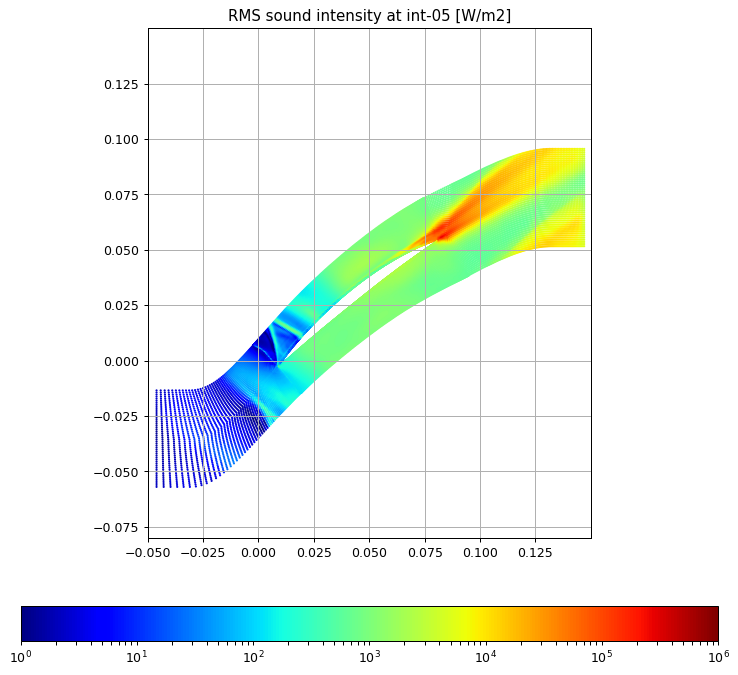

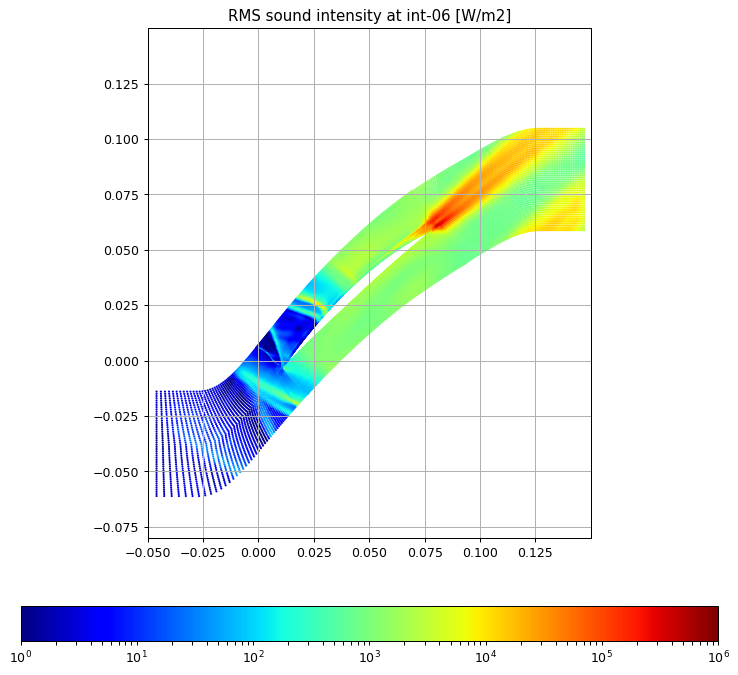

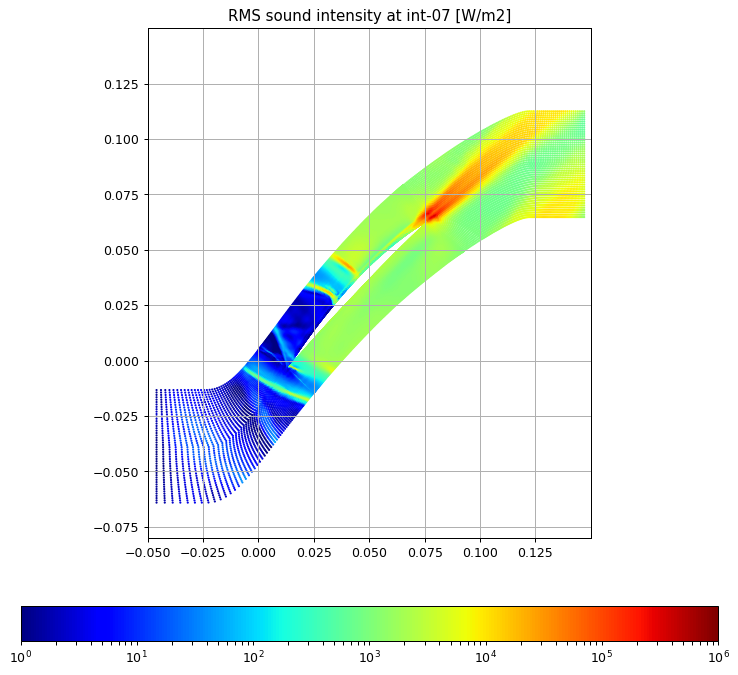

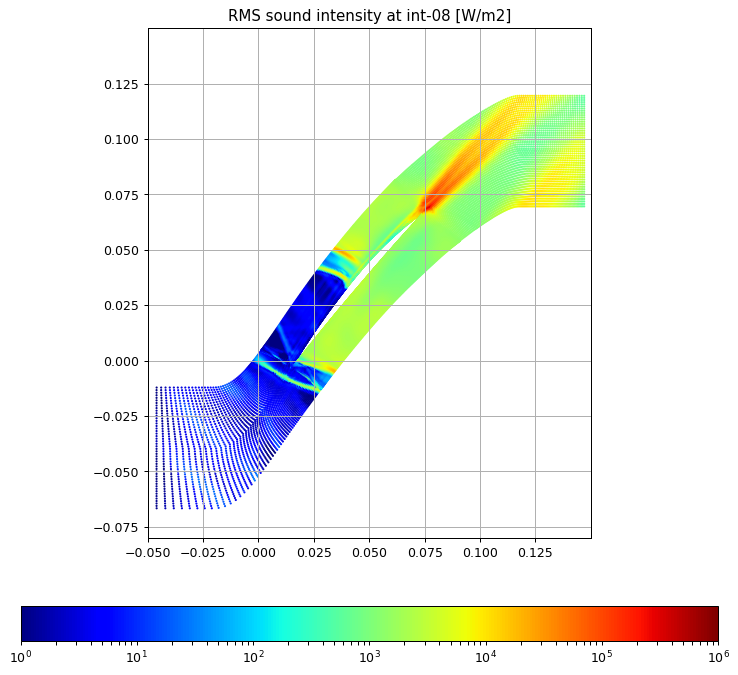

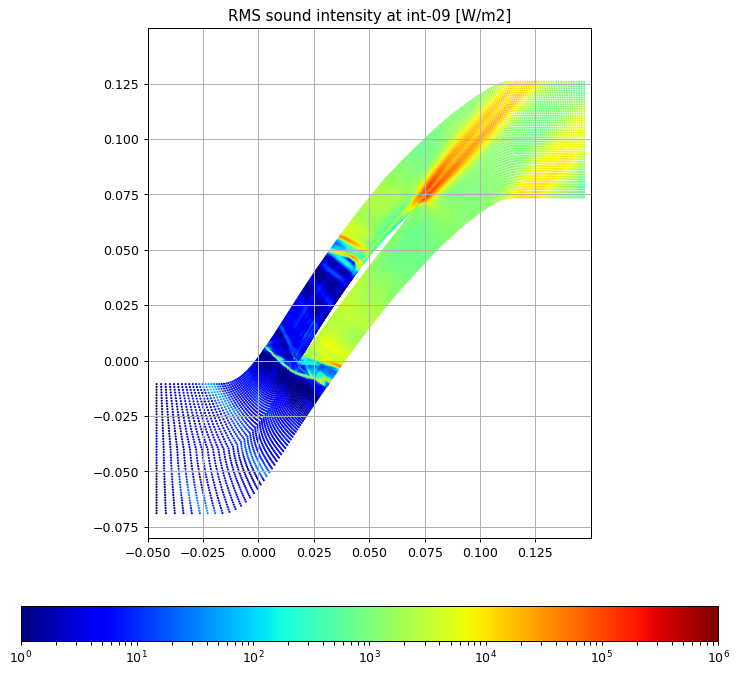

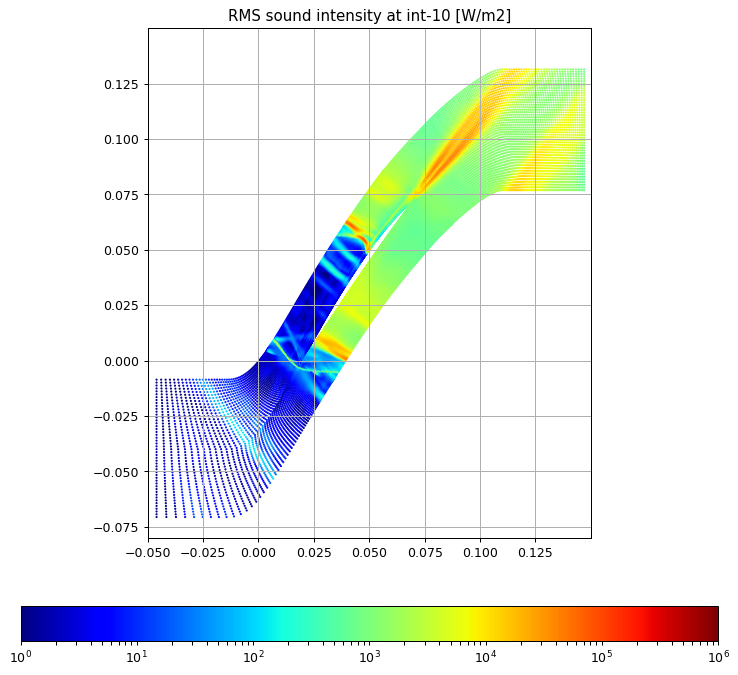

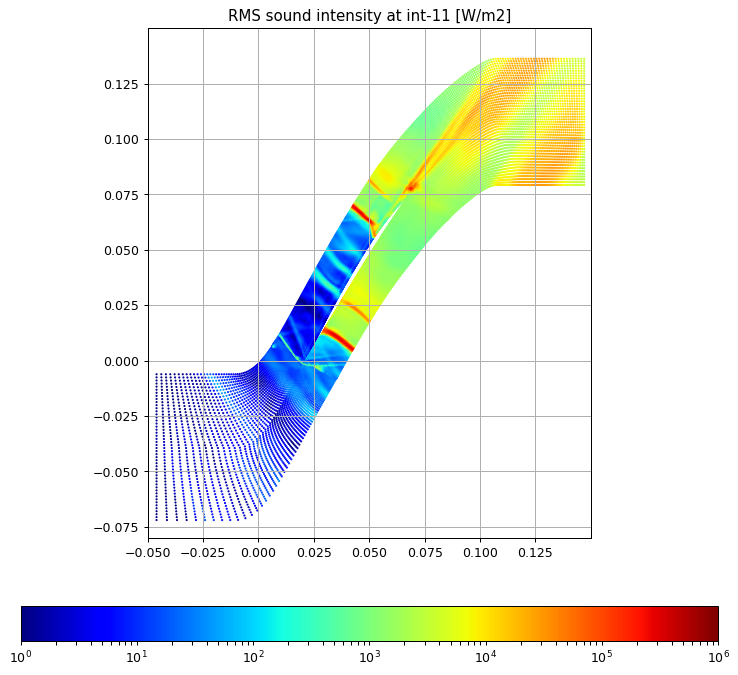

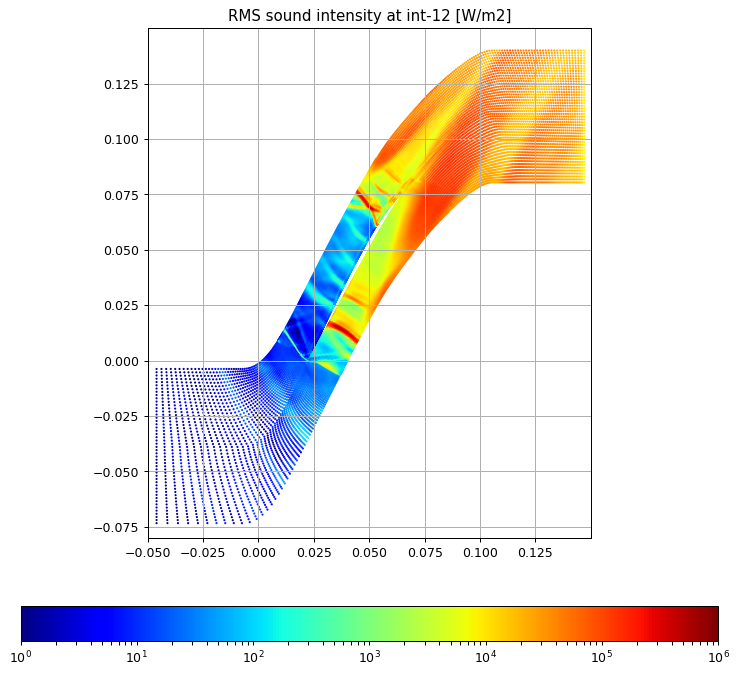

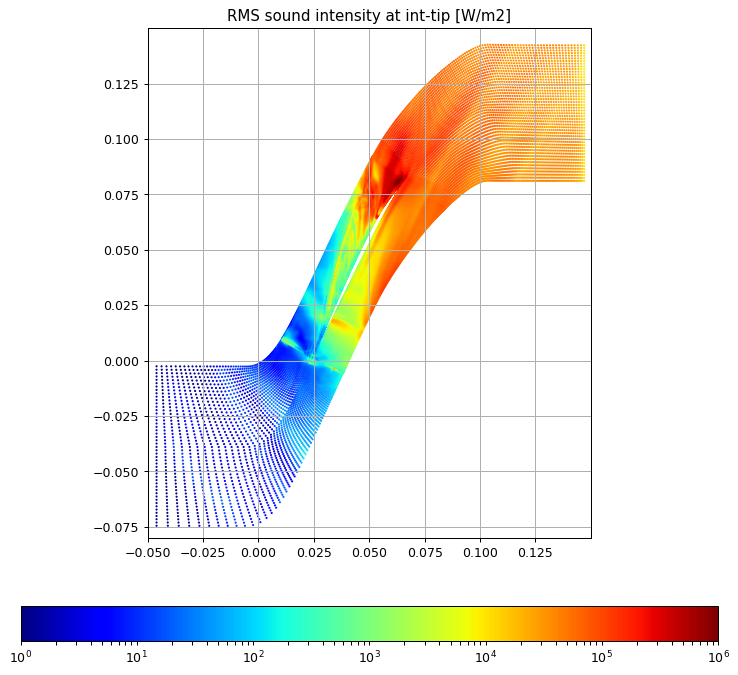

Exiting plotting loop...


In [28]:
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    sil = data['sound-intensity']
    sil_db = data['rms_sildb']
    sil_min = sil.min()
    sil_max = sil.max()

    sound_pressure_plot = plt.figure(figsize=(10, 10), dpi=90)
    ax0 = sound_pressure_plot.gca()
    sil_plot = ax0.scatter(z, x, c=sil, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=1.0e06, clip=False))
    sound_pressure_plot.colorbar(sil_plot, ax=ax0, orientation="horizontal", pad=0.1)
    ax0.set_title(str('RMS sound intensity at ' + str(location) + ' [W/m2]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    plt.grid()
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    
    i = i+1
print("Exiting plotting loop...")

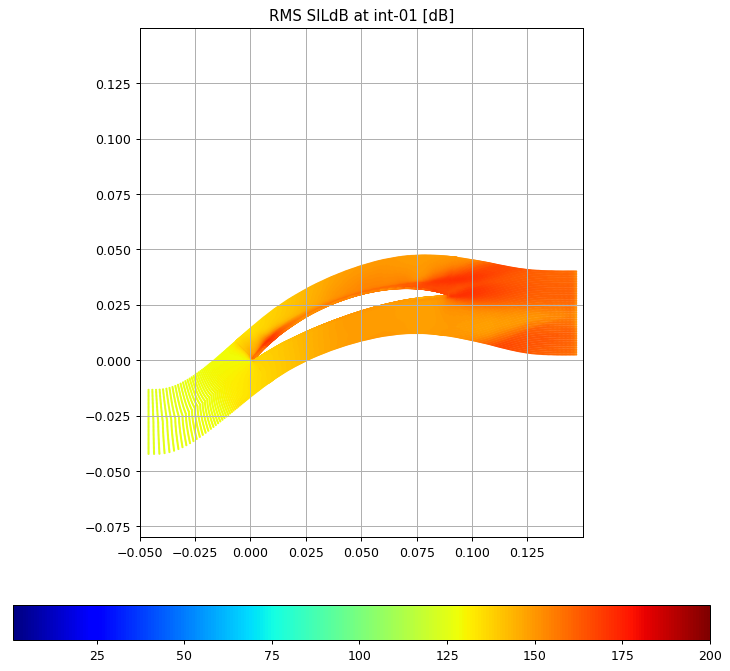

Exiting plotting loop...


In [22]:
i = 0
while i < 1:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    sil = data['sound-intensity']
    sil_db = data['rms_sildb']
    sil_min = sil.min()
    sil_max = sil.max()

    sound_pressure_plot = plt.figure(figsize=(10, 10), dpi=90)
    ax0 = sound_pressure_plot.gca()
    sil_plot = ax0.scatter(z, x, c=sil_db, s=0.5, cmap=plt.cm.jet, vmin=1, vmax=200)
    sound_pressure_plot.colorbar(sil_plot, ax=ax0, orientation="horizontal", pad=0.1)
    ax0.set_title(str('RMS SILdB at ' + str(location) + ' [dB]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    plt.grid()
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    
    i = i+1
print("Exiting plotting loop...")